Intelligent Smoking Classification System

In [24]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load dataset
data = pd.read_csv('dataset/smoking.csv')
data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [26]:
# Displaying columns
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [27]:
# Dropping unwanted columns
data = data.drop(columns=['ID','oral'])
data

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0


In [28]:
data.shape

(55692, 25)

In [29]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [30]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [31]:
# Checking for null values
data.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

Data Analysis & Visualization

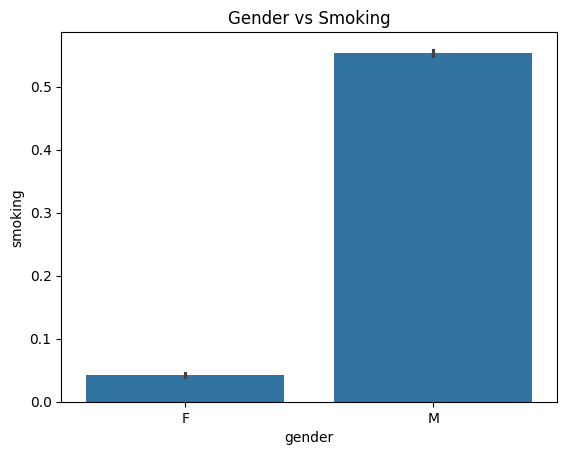

In [32]:
# Import seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot showing the relationship between gender and smoking status
sns.barplot(x='gender', y='smoking', data=data)

# Add a title to the plot
plt.title('Gender vs Smoking')

# Display the plot
plt.show()


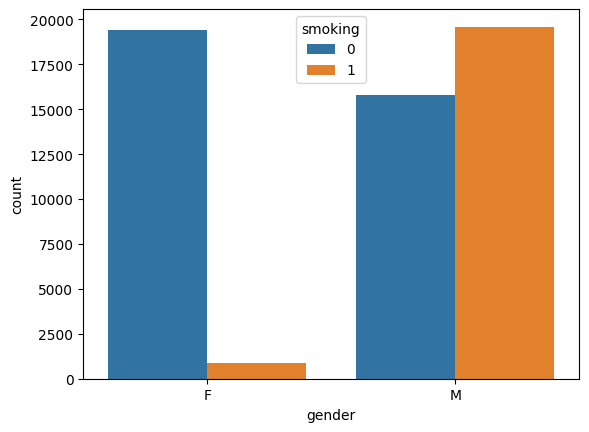

In [33]:

# Create a count plot showing the distribution of smoking status across genders
sns.countplot(x='gender', hue='smoking', data=data)

# Display the plot
plt.show()


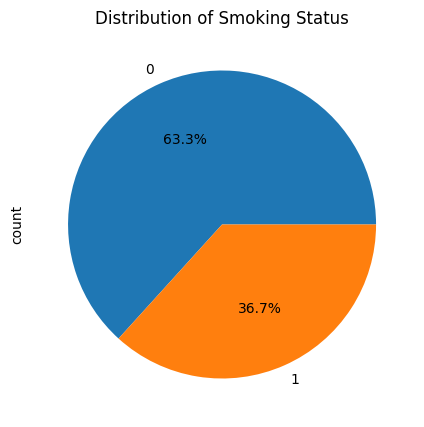

In [34]:
# Set the figure size for the pie chart
plt.figure(figsize=(10, 5))

# Create a pie chart showing the distribution of smoking status
# autopct='%1.1f%%' formats the percentage display on the pie chart
data['smoking'].value_counts().plot.pie(autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Distribution of Smoking Status')

# Display the pie chart
plt.show()
# There are 36.7 percent of the people who are smoking ciggarette.

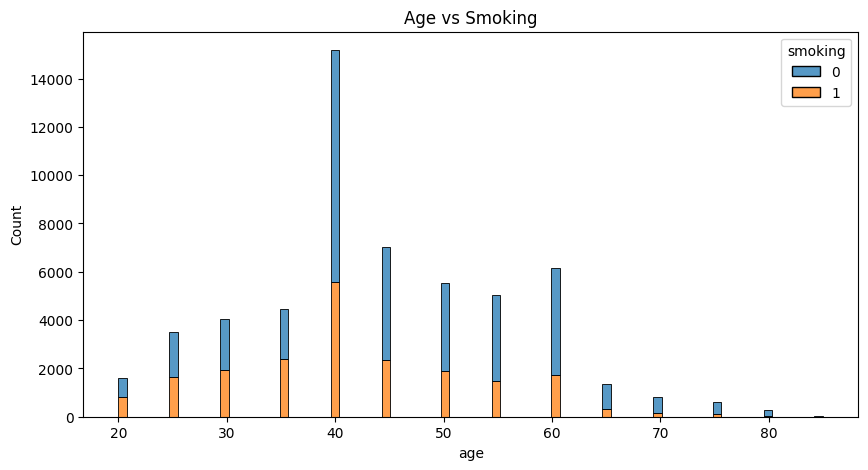

In [35]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 5))

# Create a stacked histogram showing the distribution of age for smokers and non-smokers
# 'multiple='stack'' stacks the bars for each hue category (smoking status) on top of each other
sns.histplot(data=data, x='age', hue='smoking', multiple='stack')

# Add a title to the histogram for context
plt.title('Age vs Smoking')

# Display the histogram
plt.show()
# The majority of smokers are aged 40

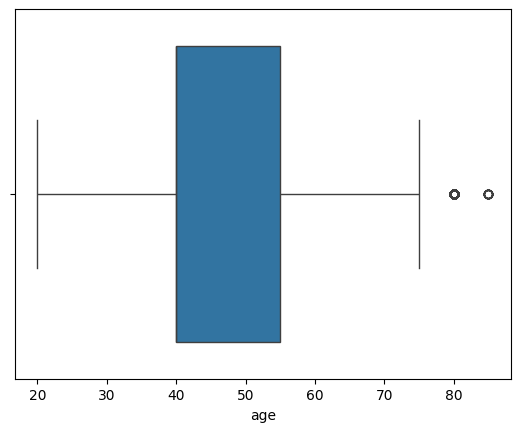

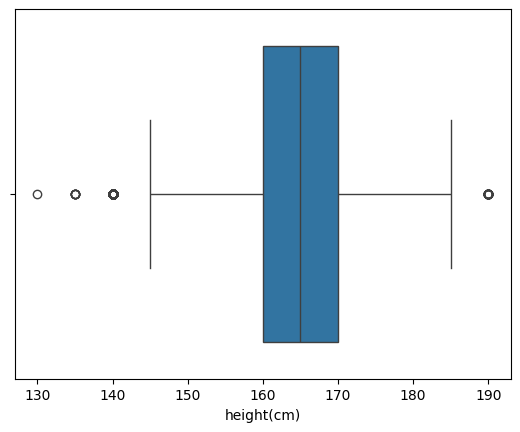

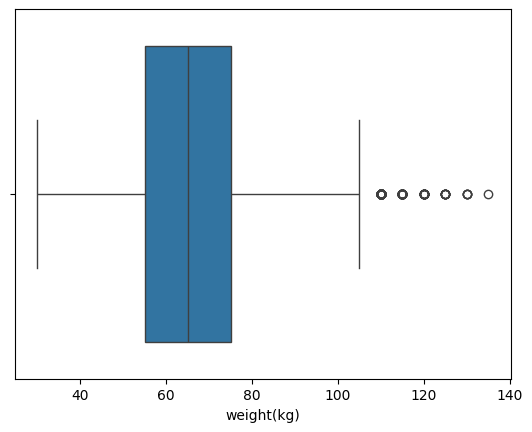

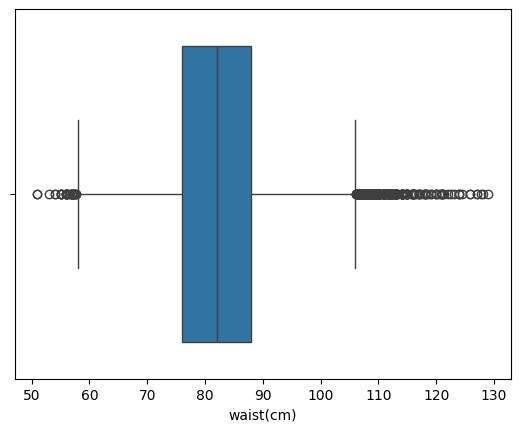

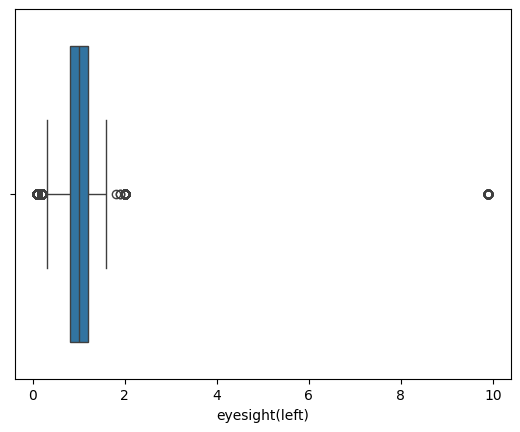

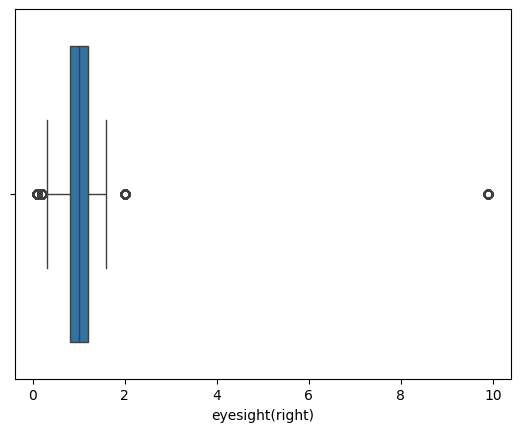

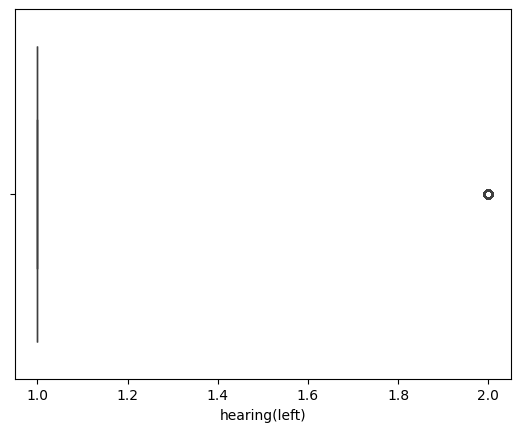

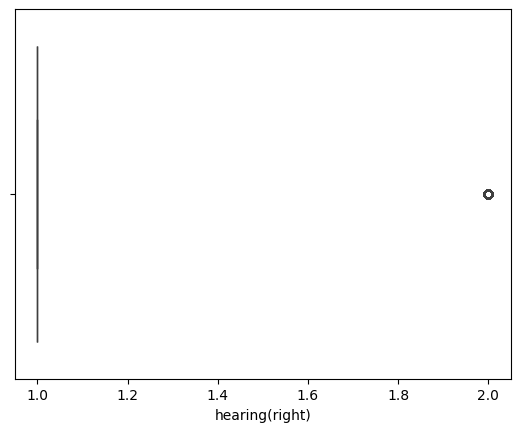

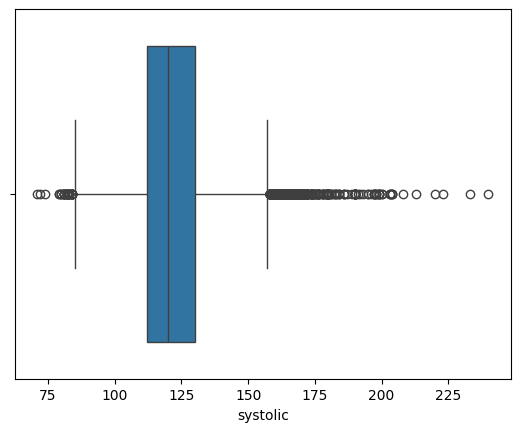

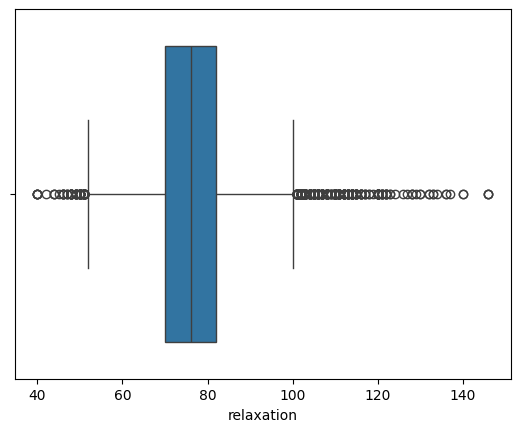

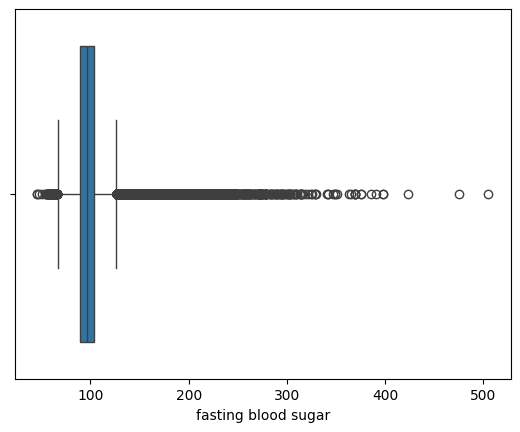

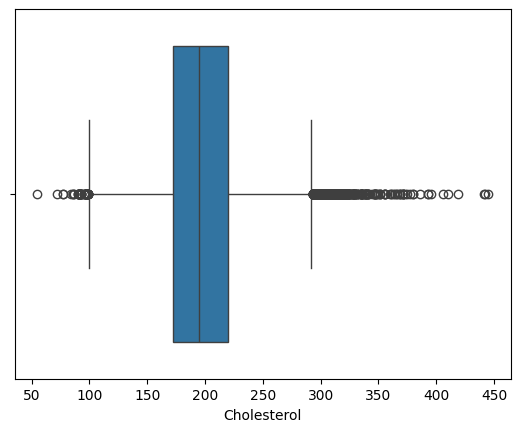

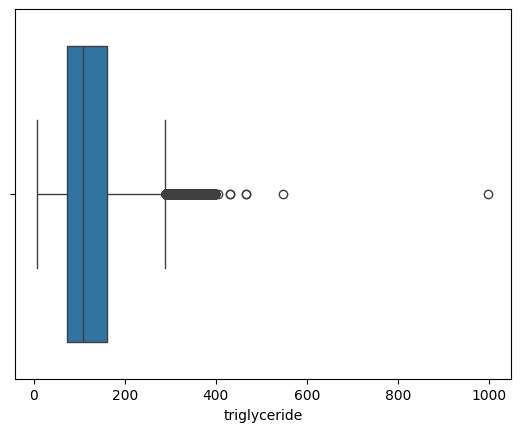

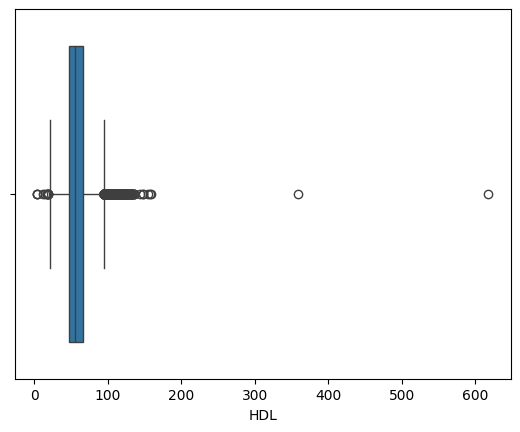

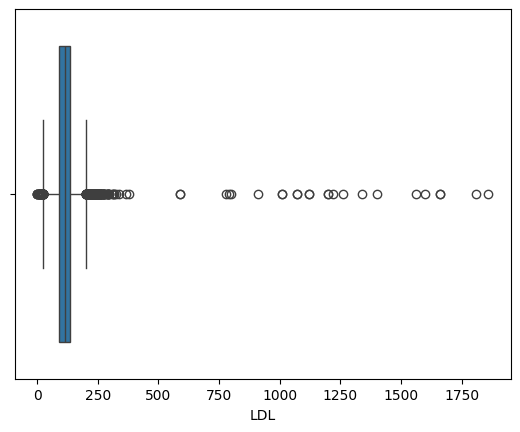

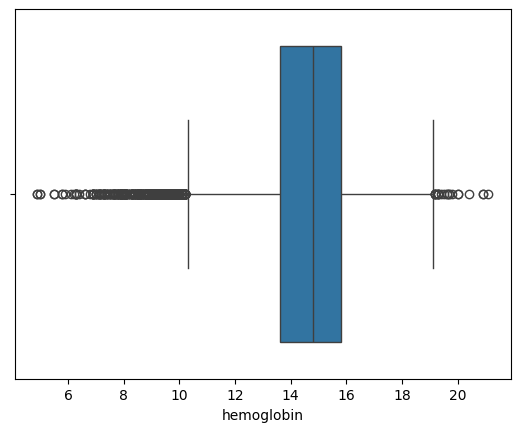

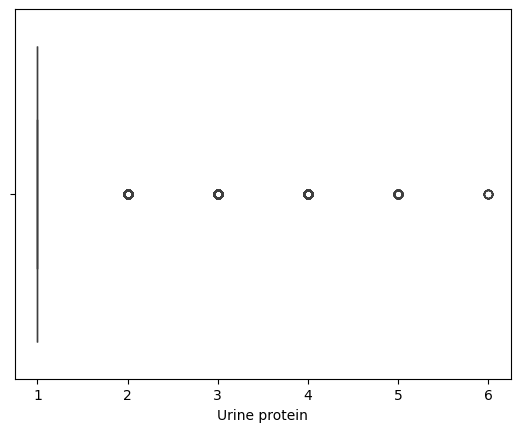

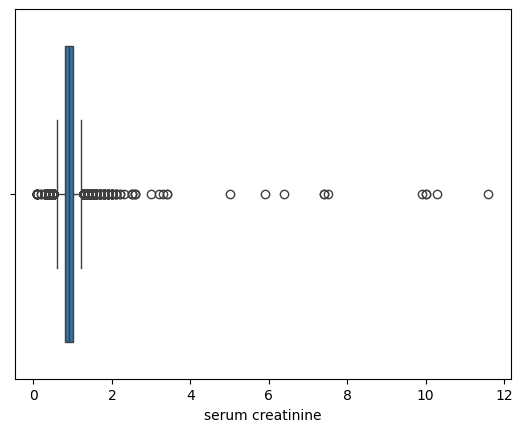

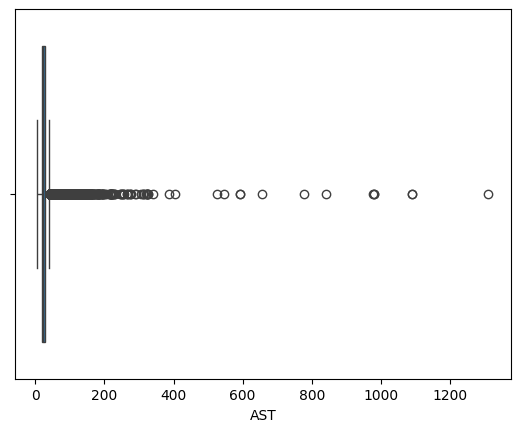

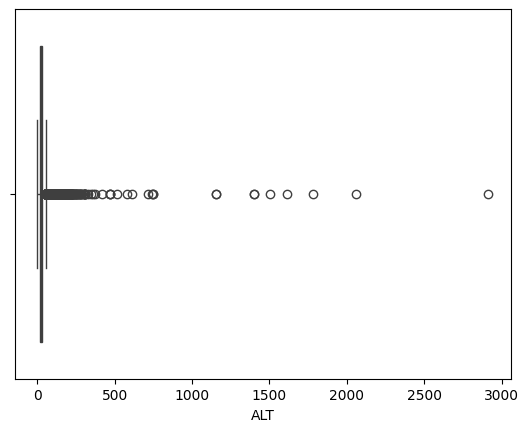

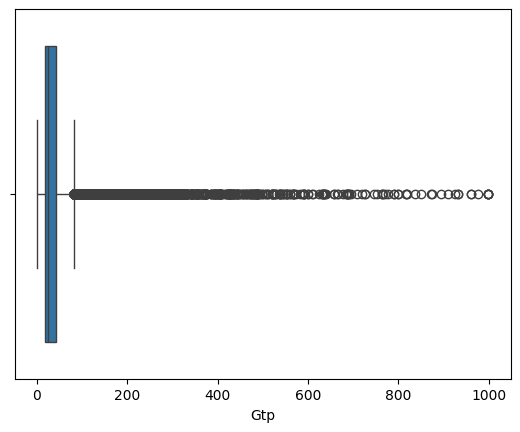

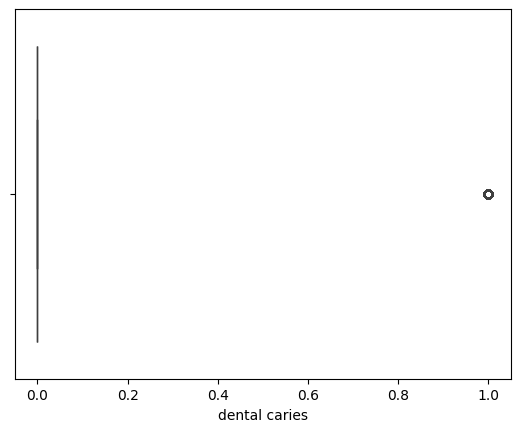

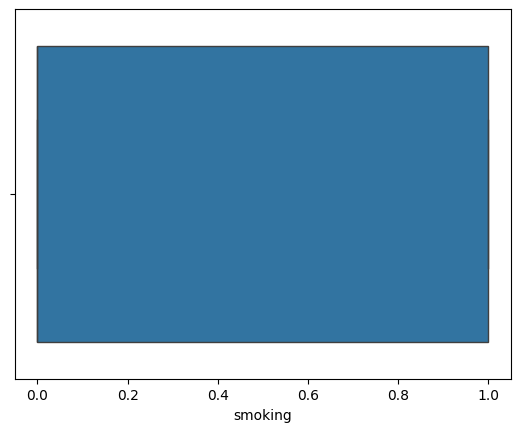

'\nHere outliers represent natural\nvariations in the population, and they should be left as is in the dataset. These are called true\noutliers. Therefore for this dataset we will not remove outliers.\n'

In [36]:
# Outliers Analysis
for col in data.columns:
    if (data[col].dtype=='int64' or data[col].dtype=='float64'):
        sns.boxplot(data=data,x=col)
        plt.show()
        
'''
Here outliers represent natural
variations in the population, and they should be left as is in the dataset. These are called true
outliers. Therefore for this dataset we will not remove outliers.
'''

Data Cleaning

In [37]:
# Import the LabelEncoder for encoding categorical features
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'gender' column, where categorical values are converted to numerical labels
data['gender'] = le.fit_transform(data['gender'])

# Encode the 'tartar' column, transforming its categorical values to numerical labels
data['tartar'] = le.fit_transform(data['tartar'])

# Encode the 'dental caries' column in a similar manner
data['dental caries'] = le.fit_transform(data['dental caries'])

# Display the summary information of the dataset, including column types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

Feature Selection

<Figure size 1000x500 with 0 Axes>

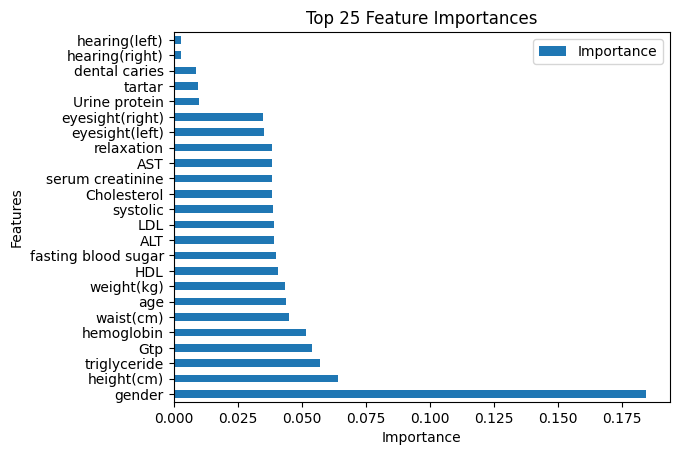

' \nFeature importance is a technique that calculates a score for each input feature in a given model. \nFrom a set of 25 features, we will select the top 15 based on their assigned scores.\n'

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# Separate the features and target variable
X = data.iloc[:, :-1]
Y = data['smoking']

# Initialize and fit the ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

# Create a DataFrame for feature importances
df = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

# Sort the DataFrame by feature importance and select the top 23 features
df_top = df.nlargest(25, 'Importance')

# Plot the top 23 features
plt.figure(figsize=(10, 5))
df_top.plot(kind='barh')
plt.title("Top 25 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

''' 
Feature importance is a technique that calculates a score for each input feature in a given model. 
From a set of 25 features, we will select the top 15 based on their assigned scores.
'''

In [39]:
# Select specific features for X (input data) that may be relevant to predicting smoking status
X = data[['gender', 'height(cm)', 'Gtp', 'weight(kg)', 'hemoglobin', 
          'triglyceride', 'waist(cm)', 'age', 'HDL', 'LDL', 
          'fasting blood sugar', 'serum creatinine', 'ALT', 
          'relaxation', 'systolic']]

# Select the target variable (smoking status) for Y
Y = data['smoking']

# Import train_test_split to split the dataset into training and test sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with 80% training and 20% testing
# Setting random_state=42 ensures the split is reproducible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [40]:
# Import StandardScaler for standardizing the feature values
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it to have zero mean and unit variance
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data (without fitting again) to maintain consistency
X_test = scaler.transform(X_test)


In [41]:
# Import the LogisticRegression model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model using the standardized training data
lr.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate and print the accuracy score of the model on the test data
logistic_regression_accuracy = accuracy_score(Y_test, y_pred)
print("Logistic Regression accuracy score: ", logistic_regression_accuracy)

# Generate and print a detailed classification report, which includes precision, recall, F1-score, and support for each class
logistic_regression_classification_report = classification_report(Y_test, y_pred)
print("Logistic Regression classification report: \n", logistic_regression_classification_report)


Logistic Regression accuracy score:  0.7348954125145883
Logistic Regression classification report: 
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139



In [42]:
# Import the DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Train the model using the training data
dt.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate and print the accuracy score of the Decision Tree model on the test data
decision_tree_accuracy = accuracy_score(Y_test, y_pred)
print("Decision Tree accuracy score: ", decision_tree_accuracy)

# Generate and print a detailed classification report, including precision, recall, F1-score, and support for each class
decision_tree_classification_report = classification_report(Y_test, y_pred)
print("Decision Tree classification report: \n", decision_tree_classification_report)


Decision Tree accuracy score:  0.7810395906275249
Decision Tree classification report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      7027
           1       0.70      0.71      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [43]:
# Import the BaggingClassifier model
from sklearn.ensemble import BaggingClassifier

# Initialize the Bagging Classifier model (by default, it uses Decision Trees as base estimators)
bg = BaggingClassifier()

# Train the Bagging model using the training data
bg.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = bg.predict(X_test)

# Calculate and print the accuracy score of the Bagging model on the test data
bagging_accuracy = accuracy_score(Y_test, y_pred)
print("Bagging accuracy score: ", bagging_accuracy)

# Generate and print a detailed classification report, including precision, recall, F1-score, and support for each class
bagging_classification_report = classification_report(Y_test, y_pred)
print("Bagging classification report: \n", bagging_classification_report)


Bagging accuracy score:  0.80312415836251
Bagging classification report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      7027
           1       0.75      0.69      0.72      4112

    accuracy                           0.80     11139
   macro avg       0.79      0.78      0.78     11139
weighted avg       0.80      0.80      0.80     11139



In [44]:
# Import the ExtraTreesClassifier model
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees Classifier model
et = ExtraTreesClassifier()

# Train the Extra Trees model using the training data
et.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = et.predict(X_test)

# Calculate and print the accuracy score of the Extra Trees model on the test data
extra_trees_accuracy = accuracy_score(Y_test, y_pred)
print("Extra Trees accuracy score: ", extra_trees_accuracy)

# Generate and print a detailed classification report, including precision, recall, F1-score, and support for each class
extra_tree_classification_report = classification_report(Y_test, y_pred)
print("Extra Trees classification report: \n", extra_tree_classification_report)


Extra Trees accuracy score:  0.8279917407307658
Extra Trees classification report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [45]:
# Import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf = RandomForestClassifier()

# Train the Random Forest model using the training data
rf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score of the Random Forest model on the test data
random_forest_accuracy = accuracy_score(Y_test, y_pred)
print("Random Forest accuracy score: ", random_forest_accuracy)

# Generate and print a detailed classification report, including precision, recall, F1-score, and support for each class
random_forest_classification_report = classification_report(Y_test, y_pred)
print("Random Forest classification report: \n", random_forest_classification_report)


Random Forest accuracy score:  0.8240416554448334
Random Forest classification report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.78      0.77      4112

    accuracy                           0.82     11139
   macro avg       0.81      0.82      0.81     11139
weighted avg       0.83      0.82      0.82     11139



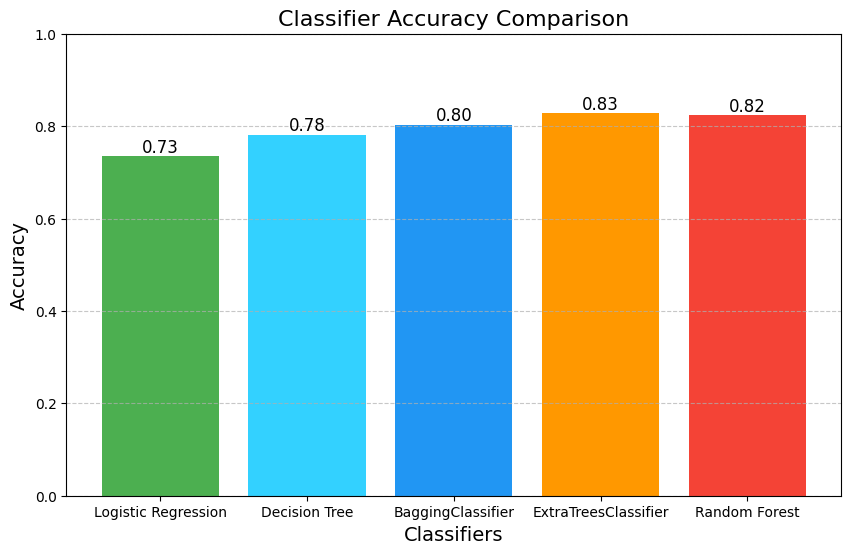

In [46]:
# List of classifiers and their corresponding accuracies
classifiers = ['Logistic Regression', 'Decision Tree','BaggingClassifier','ExtraTreesClassifier','Random Forest']
accuracies = [
    logistic_regression_accuracy,  
    decision_tree_accuracy,         
    bagging_accuracy,
    extra_trees_accuracy,
    random_forest_accuracy                       
]

# Creating a bar plot for accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=['#4CAF50','#33d1ff','#2196F3', '#FF9800', '#F44336'])

# Adding labels and title
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Classifier Accuracy Comparison', fontsize=16)

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.ylim(0, 1)  # Set y-axis limits to 0 to 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()